In [ ]:
NAME:- K S H V Sai Hari Krishna
    
TASK NO - 3

 Handwritten Digit Recognition using Neural Networks with MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 6s 1us/step


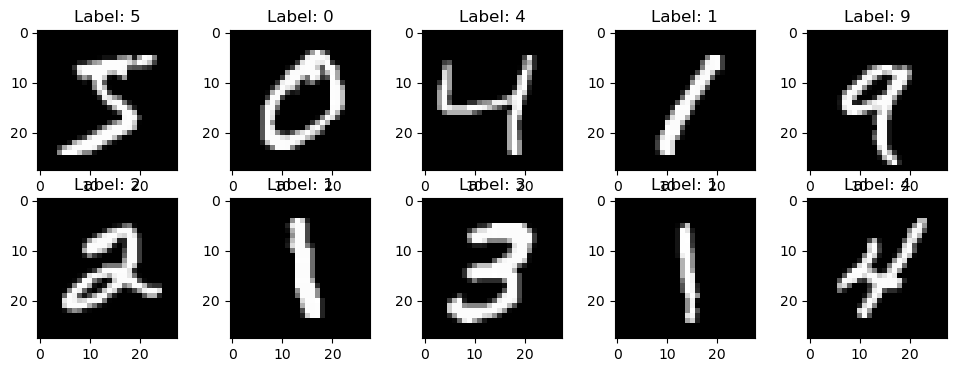

In [2]:
# Data Visualization
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.show()


In [3]:
# Normalize pixel values and reshape
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [4]:
# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1424 - accuracy: 0.9580
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1066 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0869 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9760


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - loss: 0.0743 - accuracy: 0.9774 - 671ms/epoch - 2ms/step

Test accuracy: 97.74%


313/313 [==============================] - 1s 1ms/step


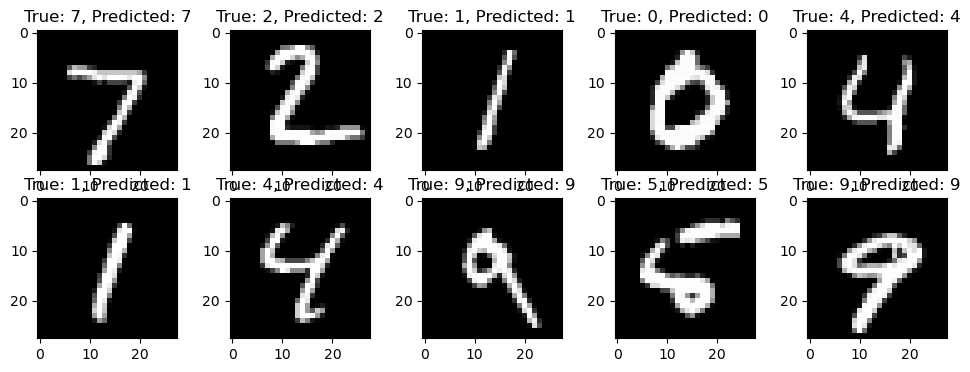

In [8]:
# Make predictions
predictions = model.predict(x_test)

# Visualize some test samples and their predicted labels
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    true_label = y_test[i]
    predicted_label = tf.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()
